# Customer Segmentation using Unsupervised Machine Learning

Customer Segmentation involves grouping customers based on shared characteristics, behaviors and preferences. By segmenting customers, businesses can tailor their strategies and target specific groups more effectively and enhance overall market value.

## 1. Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [7]:
df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20240903152131/new.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.shape

(2240, 29)

## 3. Data Preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [13]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    print(f'{col} contains {df[col].isnull().sum()} null values')

Income contains 24 null values


In [14]:
df = df.dropna()
print(f'total rows in df after dropping nulls are: {len(df)}')

total rows in df after dropping nulls are: 2216


In [17]:
df.nunique().sort_values()

,0
Z_Revenue,1
Z_CostContact,1
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp5,2
AcceptedCmp1,2
Complain,2
AcceptedCmp2,2
Response,2
Teenhome,3


Here we can observe that there are columns which contain single values in the whole column so, they have no relevance in the model development.

Also dataset has a column **Dt_Customer** which contains the date column, we can convert into 3 columns i.e. day, month, year.

In [28]:
parts = df['Dt_Customer'].str.split('-',expand=True,n=3)
df['day'] = parts[0].astype(int)
df['month'] = parts[1].astype(int)
df['year'] = parts[2].astype(int)

In [34]:
df.drop(['Dt_Customer','Z_Revenue','Z_CostContact'], axis = 1, inplace = True, errors='ignore')

## 4. Data Visualization and Analysis

In [40]:
objects = (df.dtypes == 'object')
objects = objects[objects].index

In [41]:
objects

Index(['Education', 'Marital_Status'], dtype='object')

In [44]:
floats = (df.dtypes == 'float')
floats = floats[floats].index
floats

Index(['Income'], dtype='object')

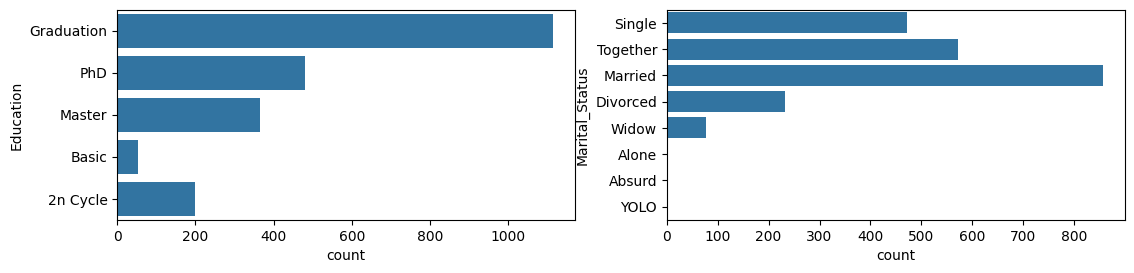

In [47]:
plt.figure(figsize=(13,6))
for i,col in enumerate(objects):
  plt.subplot(2,2, i + 1)
  sb.countplot(df[col])

plt.show()